In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
mpl.style.use('bmh')
plt.style.use('seaborn')
from google.colab import drive
drive.mount('/content/gdrive')

%cd '/content/gdrive/MyDrive'

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
df_AMZN = pd.read_csv ('/content/gdrive/MyDrive/Colab Notebooks/Amazon Sales FY2020-21.csv')
df_AMZN.head()


<ipython-input-2-e872fd3fa1d0>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_AMZN = pd.read_csv ('/content/gdrive/MyDrive/Colab Notebooks/Amazon Sales FY2020-21.csv')


,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


#Con la ayuda de las visualizaciones de Python, se ha intentado descubrir o identificar ciertos patrones con respecto a las ventas del e-commerce Amazon, durante los años 2020 y 2021.
#Se ha utilizado una gran variedad de gráficos, ya que dependiendo de las variables que se utiliza, algunos son más eficientes que otros. Los datos o variables más utilizados han sido:
* Total de ventas
* Cantidad de pedidos
* Variables de tiempo (semanas, meses, años)
* Categorías
* Edad de los consumidores
* Género
* Estados y regiones (geográficos)

In [ ]:
df_AMZN.index = df_AMZN['item_id']
df_AMZN = df_AMZN.drop ('item_id', axis = 'columns')

In [ ]:
df_AMZN.head()

,order_id,order_date,status,sku,qty_ordered,price,value,discount_amount,total,category,...,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
item_id,,,,,,,,,,,,,,,,,,,,,
574772,100354678,01/10/2020,received,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
574774,100354678,01/10/2020,received,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
574777,100354680,01/10/2020,complete,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
574779,100354680,01/10/2020,complete,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
595185,100367357,13/11/2020,received,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [ ]:
x = df_AMZN.index
y = df_AMZN['qty_ordered']
y

item_id
574772    21
574774    11
574777     9
574779     9
595185     2
          ..
905179     2
905191     2
905200     2
905202     2
905205     2
Name: qty_ordered, Length: 286392, dtype: int64

In [ ]:
df_AMZN.isnull().value_counts()

order_id  order_date  status  sku    qty_ordered  price  value  discount_amount  total  category  payment_method  bi_st  cust_id  year   month  ref_num  Name Prefix  First Name  Middle Initial  Last Name  Gender  age    full_name  E Mail  Sign in date  Phone No.   Place Name  County  City   State  Zip    Region  User Name  Discount_Percent
False     False       False   False  False        False  False  False            False  False     False           False  False    False  False  False    False        False       False           False      False   False  False      False   False         False       False       False   False  False  False  False   False      False               286392
dtype: int64

In [ ]:
df_AMZN.head()

,order_id,order_date,status,sku,qty_ordered,price,value,discount_amount,total,category,...,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
item_id,,,,,,,,,,,,,,,,,,,,,
574772,100354678,01/10/2020,received,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
574774,100354678,01/10/2020,received,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
574777,100354680,01/10/2020,complete,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
574779,100354680,01/10/2020,complete,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
595185,100367357,13/11/2020,received,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [ ]:
df_AMZN['value'].dtype

dtype('float64')

In [ ]:
df_AMZN['order_date'].dtype

dtype('O')

In [ ]:
df_AMZN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286392 entries, 574772 to 905205
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   sku               286392 non-null  object 
 4   qty_ordered       286392 non-null  int64  
 5   price             286392 non-null  float64
 6   value             286392 non-null  float64
 7   discount_amount   286392 non-null  float64
 8   total             286392 non-null  float64
 9   category          286392 non-null  object 
 10  payment_method    286392 non-null  object 
 11  bi_st             286392 non-null  object 
 12  cust_id           286392 non-null  int64  
 13  year              286392 non-null  int64  
 14  month             286392 non-null  object 
 15  ref_num           286392 non-null  int64  
 16  Name Prefix    

In [ ]:
df_AMZN['order_date'] = pd.to_datetime(df_AMZN['order_date'])

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/11/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '21/10/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '28/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [ ]:
# Extraer mes de order_date
df_AMZN['Mes'] = df_AMZN['order_date'].dt.month

In [ ]:
# Agrupar por mes las ventas
df_AMZN_mes = df_AMZN.groupby('Mes').sum()

In [ ]:
df_AMZN_mes

,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
Mes,,,,,,,,,,,
1,66954,1.132965e+07,1.358939e+07,9.495211e+05,1.263987e+07,1314960012,38689060,10680028752,899404,946737389,95141.640058
2,31820,5.909050e+06,6.400032e+06,1.876318e+05,6.212400e+06,666022305,20235500,5672257142,467223,504473869,29467.504623
3,92355,2.543737e+07,2.812228e+07,2.290738e+06,2.583155e+07,2026508821,54588343,14974344129,1240402,1355671035,122534.072354
4,143187,2.392438e+07,3.314348e+07,2.232363e+06,3.091112e+07,3100467403,74604601,20507482935,1728572,1854717818,161451.207440
5,43380,9.319589e+06,1.038650e+07,4.131741e+05,9.973325e+06,1062668853,28242474,7890077702,654625,697362384,45240.082399
6,83452,2.631612e+07,2.327854e+07,1.542141e+06,2.173640e+07,1830463795,47988332,13509481064,1100557,1189881479,167669.513090
7,41366,1.563843e+07,1.459422e+07,3.714613e+05,1.422276e+07,1100413882,28642377,7908591559,653545,714059196,54016.403237
8,34648,1.485135e+07,1.770065e+07,1.709248e+05,1.752973e+07,996191629,24933903,6974310733,571882,606863729,33497.964919
9,48582,1.414358e+07,1.251126e+07,5.935394e+05,1.191772e+07,1124752961,29240997,8155345009,670085,704798591,79429.700337


In [ ]:
df_AMZN.head()

,order_id,order_date,status,sku,qty_ordered,price,value,discount_amount,total,category,...,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent,Mes
item_id,,,,,,,,,,,,,,,,,,,,,
574772,100354678,2020-01-10,received,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,...,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1
574774,100354678,2020-01-10,received,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,...,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1
574777,100354680,2020-01-10,complete,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,...,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1
574779,100354680,2020-01-10,complete,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,...,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1
595185,100367357,2020-11-13,received,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,...,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,11


In [ ]:
# Total ventas multiplicando precio del item por cantidad vendida
df_AMZN['Total_Ventas'] = df_AMZN['qty_ordered'] * df_AMZN['price']

In [ ]:
# Resetear index en el df_AMZN_mes
df_AMZN_mes = df_AMZN_mes.reset_index()

In [ ]:
df_AMZN_mes

,Mes,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
0,1,66954,1.132965e+07,1.358939e+07,9.495211e+05,1.263987e+07,1314960012,38689060,10680028752,899404,946737389,95141.640058
1,2,31820,5.909050e+06,6.400032e+06,1.876318e+05,6.212400e+06,666022305,20235500,5672257142,467223,504473869,29467.504623
2,3,92355,2.543737e+07,2.812228e+07,2.290738e+06,2.583155e+07,2026508821,54588343,14974344129,1240402,1355671035,122534.072354
3,4,143187,2.392438e+07,3.314348e+07,2.232363e+06,3.091112e+07,3100467403,74604601,20507482935,1728572,1854717818,161451.207440
4,5,43380,9.319589e+06,1.038650e+07,4.131741e+05,9.973325e+06,1062668853,28242474,7890077702,654625,697362384,45240.082399
5,6,83452,2.631612e+07,2.327854e+07,1.542141e+06,2.173640e+07,1830463795,47988332,13509481064,1100557,1189881479,167669.513090
6,7,41366,1.563843e+07,1.459422e+07,3.714613e+05,1.422276e+07,1100413882,28642377,7908591559,653545,714059196,54016.403237
7,8,34648,1.485135e+07,1.770065e+07,1.709248e+05,1.752973e+07,996191629,24933903,6974310733,571882,606863729,33497.964919
8,9,48582,1.414358e+07,1.251126e+07,5.935394e+05,1.191772e+07,1124752961,29240997,8155345009,670085,704798591,79429.700337
9,10,30304,8.027450e+06,8.340413e+06,2.748272e+05,8.065586e+06,676594789,22867190,6312594688,537948,555091165,47330.179011


<BarContainer object of 12 artists>

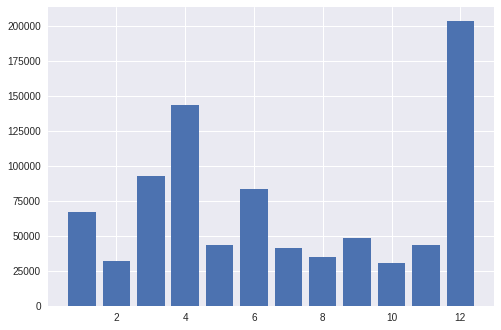

In [ ]:
#Graficar cantidad de pedidos por mes
plt.bar(df_AMZN_mes['Mes'],df_AMZN_mes['qty_ordered'])

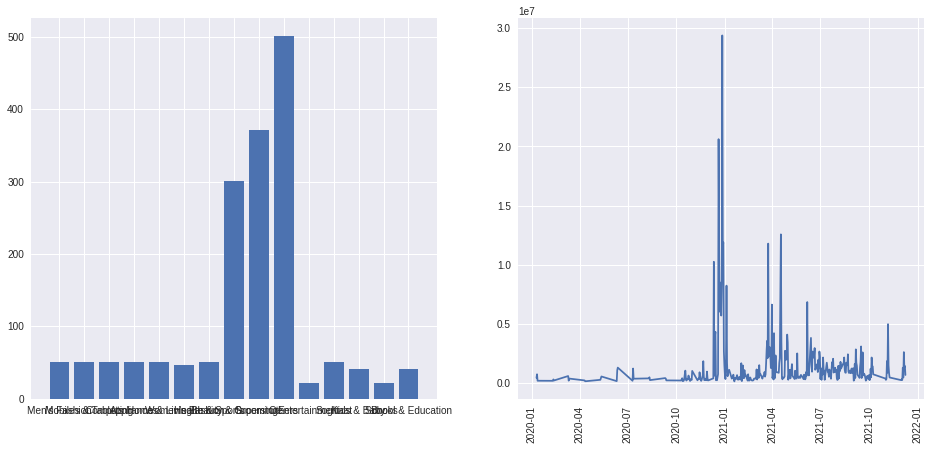

In [ ]:
# Hacer subplot de graficos. Izquierdo: Cantidad de pedidos según categorías // Derecho:Total de ventas en 2 años, por trimestres
fig, axes = plt.subplots(1,2, figsize = (16,7))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.bar(df_AMZN['category'], df_AMZN['qty_ordered'])
ax2.plot(df_AMZN_fecha['Total_Ventas'])
ax1,ax2 = plt.xticks(rotation=90)

plt.show()


In [ ]:
# Agrupar por fechas
df_AMZN_fecha = df_AMZN.groupby('order_date').sum()
df_AMZN_fecha.head()

,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent,Mes,Total_Ventas
order_date,,,,,,,,,,,,,
2020-01-10,1168,195216.711,221812.111,2140.00000,219672.11100,20999981,864560,212068218,19573,24355339,987.073666,428,417028.822
2020-01-11,1004,388250.300,323093.500,8985.52297,314107.97703,18490256,733260,200342647,17935,18688142,2569.872878,363,711343.800
2020-01-12,363,80348.700,81572.700,20.00000,81552.70000,9032959,349460,92628896,7248,8123672,75.249260,173,161921.400
2020-02-10,843,74844.970,81741.490,2810.00000,78931.49000,16716722,731240,214505160,16701,16244407,972.824019,724,156586.460
2020-02-11,438,130781.900,142256.400,1220.00000,141036.40000,9277466,367640,97628144,8018,12056990,104.748572,364,273038.300


In [ ]:
#Organizar fechas por semanas para obtener más detalles
df_AMZN_fecha = df_AMZN_fecha.resample('W').sum()

In [ ]:
df_AMZN_fecha.head(10)

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent,Mes,Total_Ventas
order_date,,,,,,,,,,,,,,
2020-01-12,563389539,2535,663815.711,626478.311,11145.52297,615332.78803,48523196,1947280,505039761,44756,51167153,3632.195803,964,1290294.022
2020-01-19,0,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
2020-01-26,0,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
2020-02-02,0,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
2020-02-09,0,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
2020-02-16,453547909,1782,293381.545,317296.965,4440.00100,312856.96400,37350677,1561460,442307214,35705,41487012,1387.549690,1546,610678.510
2020-02-23,0,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
2020-03-01,0,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
2020-03-08,0,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000


#Agrupar por estados las ventas

In [ ]:
df_AMZN_state = df_AMZN.groupby('State').sum()

#Resetear el index para poder utilizar la variable estados en los gráficos

In [ ]:
df_AMZN_state = df_AMZN_state.reset_index()

In [ ]:
df_AMZN_state.head(10)

,State,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent,Mes,Total_Ventas
0,AK,1865501967,8889,2.150210e+06,2.165456e+06,1.981329e+05,1.967323e+06,162926205,5069749,1357467933,126973,250147245,17137.203578,19024,4.315666e+06
1,AL,3917783358,15753,4.187979e+06,4.168818e+06,3.663281e+05,3.802490e+06,362462438,10612417,2967450416,247838,189102685,30577.908506,38845,8.356797e+06
2,AR,3558690355,13538,4.093113e+06,4.020160e+06,3.113768e+05,3.708783e+06,323526076,9828209,2662121699,228791,351511855,26856.989731,35779,8.113274e+06
3,AZ,2730189271,10996,3.331366e+06,3.367133e+06,2.508751e+05,3.116258e+06,239096323,7500401,2100192579,182172,317605474,20922.613028,28727,6.698499e+06
4,CA,12606718484,49832,1.520294e+07,1.530266e+07,1.426480e+06,1.387618e+07,1196664366,34612989,9342379743,776701,1600955339,111344.971622,127613,3.050559e+07
5,CO,3793720028,14090,4.037885e+06,4.078789e+06,3.063538e+05,3.772435e+06,371381104,10176060,2626414292,219343,406435545,28065.779836,36928,8.116674e+06
6,CT,2240494087,8913,2.211472e+06,2.092402e+06,1.992293e+05,1.893172e+06,207051356,6136576,1691253821,132405,19509976,21711.449909,22886,4.303874e+06
7,DC,1378929021,5651,1.478855e+06,1.464539e+06,1.532547e+05,1.311284e+06,130229901,3768386,1008519885,87035,38434111,12268.595985,14662,2.943394e+06
8,DE,522879187,2202,5.512089e+05,5.591320e+05,7.762040e+04,4.815116e+05,45604142,1444720,386144427,32693,14210766,6467.094171,5562,1.110341e+06
9,FL,7797724462,31641,9.157738e+06,9.271474e+06,8.124370e+05,8.459037e+06,727938309,21293304,6030113815,491995,350922118,64185.659495,78631,1.842921e+07


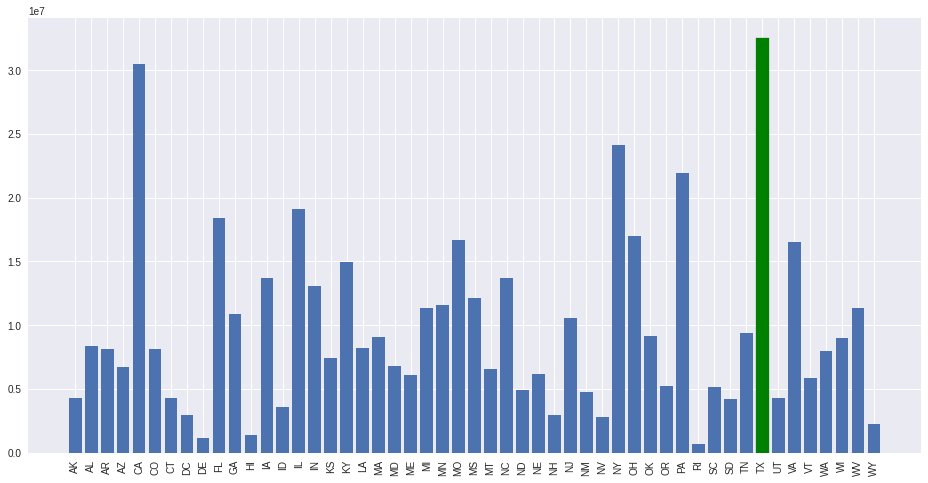

In [ ]:
#Graficar el total de ventas según los Estados
plt.figure(figsize=(16,8))
bars=plt.bar(df_AMZN_state['State'], df_AMZN_state['Total_Ventas'])
plt.xticks(rotation=90)
bars[43].set_color('g')
plt.show()

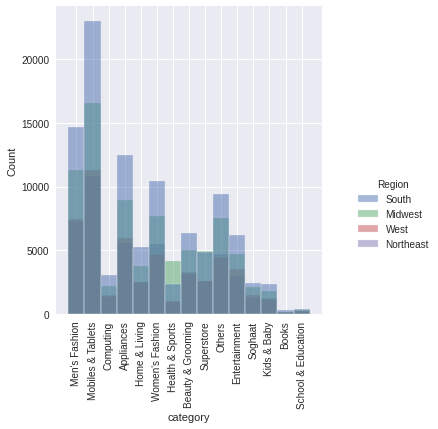

In [ ]:
#Graficar las ventas por categoría y por región
sns.displot(data=df_AMZN, x='category', hue='Region')
plt.xticks(rotation=90)
plt.show()

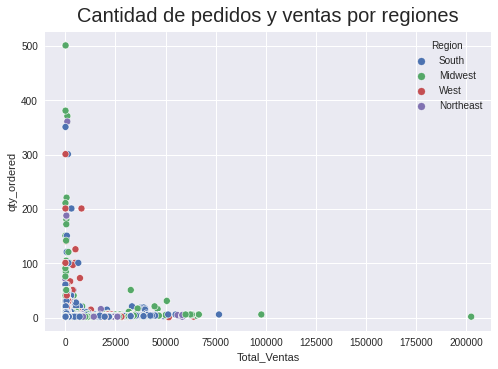

In [ ]:
#Graficar el total de ventas, relacionándolo con la cantidad de pedidos ordenados y las distintas regiones
plt.title("Cantidad de pedidos y ventas por regiones", fontsize=20, verticalalignment='bottom');
sns.scatterplot(data=df_AMZN, x="Total_Ventas", y="qty_ordered", hue="Region")

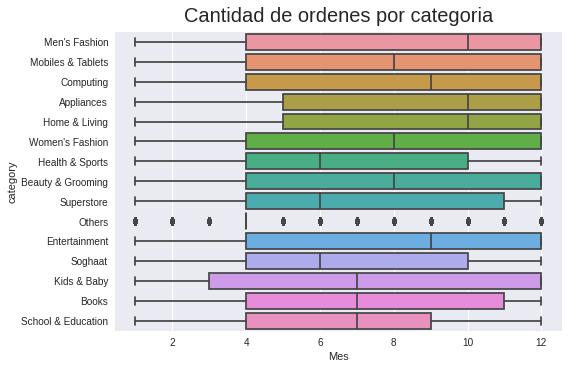

In [ ]:
#Graficar el total de ordenes según categorías a lo largo del año.
plt.title("Cantidad de ordenes por categoria", fontsize=20, verticalalignment='bottom');
sns.boxplot(x="Mes", y="category", data=df_AMZN)

# Resetear index en el df_AMZN_fecha para poder observar semanalmente las ventas


In [ ]:
df_AMZN_fecha = df_AMZN_fecha.reset_index()

In [ ]:
df_AMZN_fecha.head()

,order_date,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent,Mes,Total_Ventas
0,2020-01-12,2535,663815.711,626478.311,11145.52297,615332.78803,48523196,1947280,505039761,44756,51167153,3632.195803,964,1290294.022
1,2020-01-19,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
2,2020-01-26,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
3,2020-02-02,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
4,2020-02-09,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000


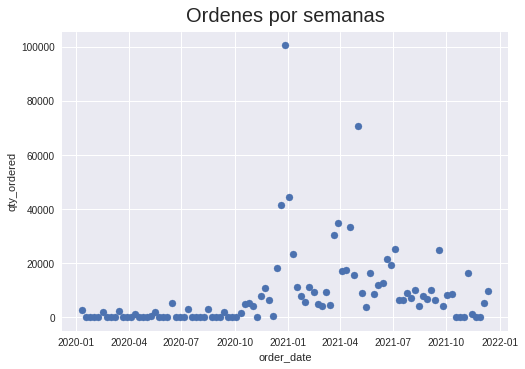

In [ ]:
# Graficar ordenes pedidas por semanas. Se puede observar la relación en el lapso del inicio de la pandemia con las pocas ordenes
plt.scatter(df_AMZN_fecha['order_date'],df_AMZN_fecha['qty_ordered'])
plt.title("Ordenes por semanas", fontsize=20, verticalalignment='bottom');
plt.xlabel("order_date");
plt.ylabel("qty_ordered");

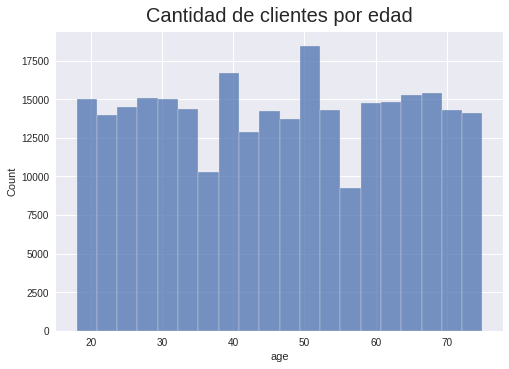

In [ ]:
# Graficar distribución de las edades de los clientes
plt.title("Cantidad de clientes por edad", fontsize=20, verticalalignment='bottom');
sns.histplot(data= df_AMZN, x= "age", bins=20)

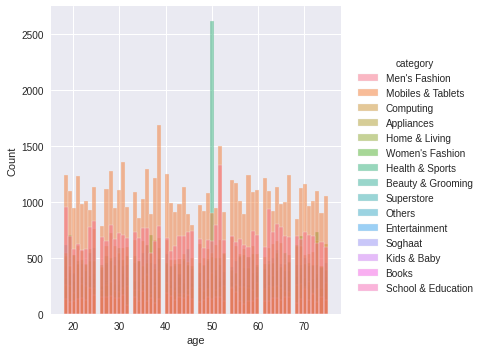

In [ ]:
#Graficar las ventas por categoría y por región
sns.displot(data=df_AMZN, x='age', hue='category')
plt.show()

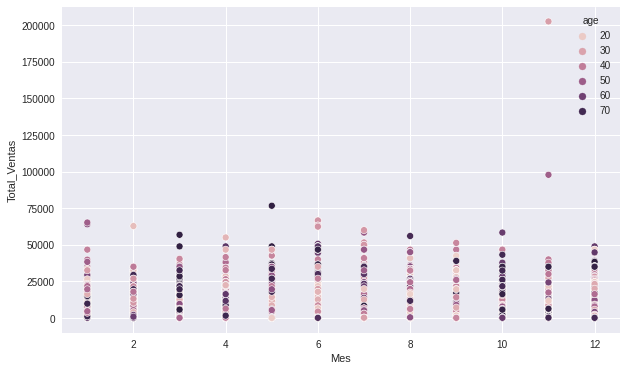

In [ ]:
# Graficar las ventas según las edades a lo largo de año
sns.set_style= ('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(x= df_AMZN.Mes, y= df_AMZN.Total_Ventas, hue= df_AMZN.age)

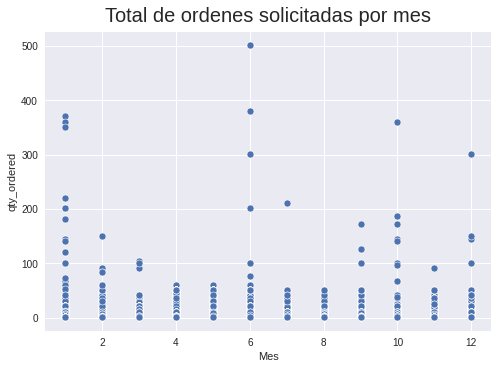

In [ ]:
# Graficar la cantidad de ordenes por mes
plt.title("Total de ordenes solicitadas por mes", fontsize=20, verticalalignment='bottom');
sns.scatterplot(x='Mes', y='qty_ordered',data= df_AMZN)
plt.show()


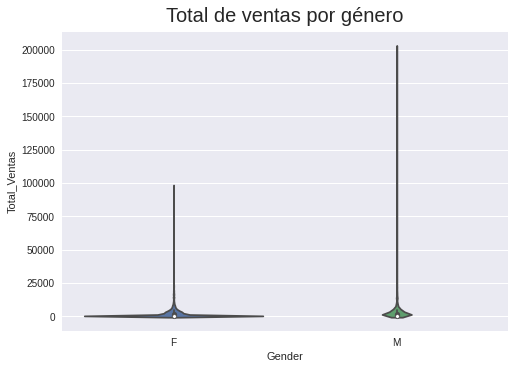

In [ ]:
# Graficar total de ventas según género
plt.title("Total de ventas por género", fontsize=20, verticalalignment='bottom');
sns.violinplot(x= df_AMZN.Gender, y=df_AMZN.Total_Ventas , data= df_AMZN)

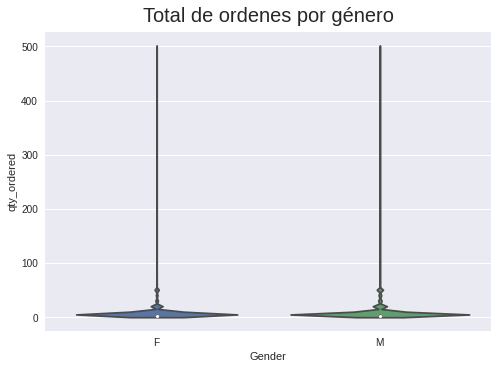

In [ ]:
# Graficar total de pedidos según género
plt.title("Total de ordenes por género", fontsize=20, verticalalignment='bottom');
sns.violinplot(x= df_AMZN.Gender, y=df_AMZN.qty_ordered , data= df_AMZN)



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


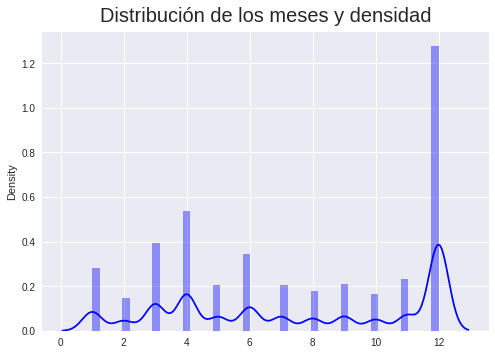

In [ ]:
# Graficar distribución en los meses junto con la densidad de los mismos
plt.title("Distribución de los meses y densidad", fontsize=20, verticalalignment='bottom');
sns.distplot(x= df_AMZN.Mes, color= 'blue')

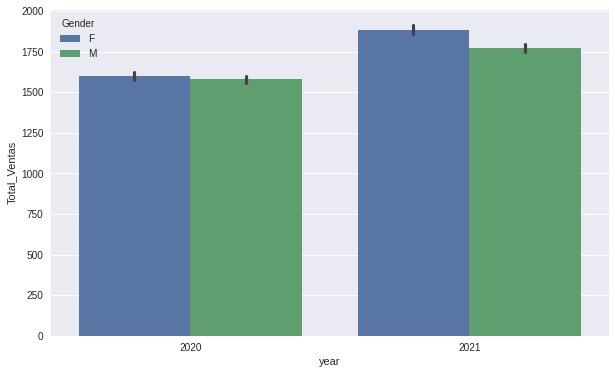

In [ ]:
# Graficar el total de ventas por género en cada año
plt.figure(figsize=(10,6))
sns.barplot(x= df_AMZN.year, y=df_AMZN.Total_Ventas , hue= df_AMZN.Gender, data= df_AMZN)


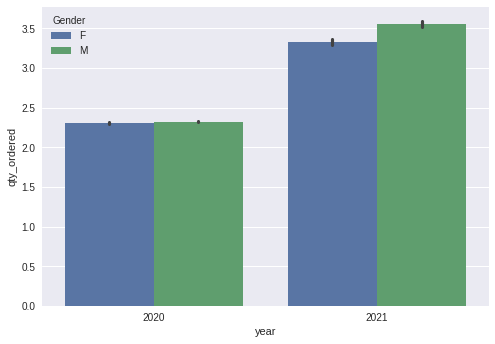

In [ ]:
# Graficar la cantidad de ordenes por género en cada año
sns.barplot(x='year', y = 'qty_ordered', hue = 'Gender', data = df_AMZN)

#Potenciales hipótesis: luego de haber realizado gráficos de diversos tipos, relacionando unas variables con otras y, habiendo observado los mismos, se han formulado las siguientes hipótesis, que se encontrarán a continuación. Los objetivos por los cuales se buscará aceptar o rechazar dichas hipótesis, entre otros, serán:

*  Segmentar a los clientes según las edades y las categorías que consumen

*  Identificar qué meses son más fuertes en ventas y/o pedidos, y si se relacionan con fechas en particular (ej. Navidad)

*  Lograr subir las ventas ($) en las mujeres, ya que realizan los mismos o más pedidos que los hombres, pero gastan menos dinero

*  Identificar si las ventas por estados se relacionan con la población y la situación económica de los mismos

*  Determinar si existen más productos/categorías para grupos etarios mayores, ya que predominan entre el total de clientes

*  Cuantificar de qué manera "golpeó" a nivel ventas el inicio de la pandemia en 2020, con respecto a 2021




# HIPÓTESIS PRELIMINARES


* Texas y luego California son los estados con más ventas. Tiene esto relación con el tamaño de la población de estos? O influyen otros factores como los económicos y sociales?

* La categoría Health & Sports es la que menos pedidos tiene en el año, concentrando la mayor cantidad en el segundo trimestre del mismo. Es esta una tendencia en ascenso?

* La distribución de las ordenes durante el año arroja que en el mes 6 es cuando más se compra, lo que no significa que sea el mes que mayor beneficios genera. Comprobar dicha relación

* Los grupos etarios de mayor edad están muy presentes en la cantidad de clientes, siendo el grupor de 50, el que cuenta con mayor cantidad. Se debe esto a la mejor posición económica y una edad a la que se consume más? O puede tener que ver con las categorías disponibles para ellos?

* A la hora de hablar de ventas por categorías, los electrónicos y la tecnología en general son los grandes ganadores.

* El grupo etario más presente, el de 50 años, consume mayormente categorías sobre deportes y salud.

* Los grupos etarios de mayor edad (60-70), lideran las compras en los meses 3 y 10. Cuál es la razón?

* Los hombres generan el doble en ventas que las mujeres. Sin embargo, la cantidad de pedidos que realizan son los mismos. Es decir, las compras que realizan los hombres son más costosas. Tiene que ver con alguna categoría en especial que sea más costosa? Otra opción podría ser que la mujer consuma muchos productos pero de bajo valor.

* Las ventas en 2020 con respecto a los géneros fueron prácticamente iguales, levemente superior en las mujeres. Por otro lado, el 2021 subieron las ventas en general, y además las mujeres agrandaron esa brecha. Sin embargo, de manera inversamente proporcional, al hablar de cantidad de ordenes realizadas, en el 2020 estas estuvieron ligeramente lideradas por los hombres, y en el 2021 se distanció esa brecha, ya que fueron por los que realizaron más ordenes. Esto se contradice con la hipótesis anterior. Cuál de los gráficos es el correcto? A qué se debe esta diferencia en los gráficos?

* Diciembre es un mes con muchas ventas, tiene esto estrecha relación con las fechas festivas como navidad o el fin del año?

* Al arranque de 2021 se nota una gran suba en la cantidad de pedidos, se debe esto a la puesta en marcha del comercio electrónico luego del golpe de la pandemia?

#CUARTA ENTREGA PROYECTO FINAL DS 2023

OBJETIVO: Segmentación de clientes de Amazon, teniendo en cuenta las edades, las categorías que consumen y los meses en el año que más compran

CONTEXTO COMERCIAL: Amazon tiene como lema que es la tienda más centrada en el cliente del mundo. Esta es una de las 500 mayores empresas de EE.UU.
La compañía, con sede en Seattle (Washington) es un líder global en el comercio electrónico y también en los servicios de computación en la nube.
Opera en más de 180 países y tiene más de 300 millones de cuentas de clientes activas y casi 2 millones de socios comerciales en el mundo entero.
Es por ello que resulta clave poder realizar una segmentación de clientes, para poder optimizar los procesos y toma de decisiones, y aplicarlos a las recomendaciones, ofertas, descuentos, y de esa manera lograr aumentar las ventas.

PROBLEMA COMERCIAL:

* Qué género realiza más compras? Esto se traduce a mayores ventas? Qué días compran más?

* Cómo es la distribución de clientes por edades en cuanto a pedidos realizados? Y en cuanto a ventas?

* Comparar las ventas de 2020 y 2021 teniendo en cuenta las categorías. Cuáles aumentaron más? Ha mejorado su performance la categoría Health & Sports? Ya que esta era la que menos ordenes recibía.

* Cuáles son los meses en los que más se compra? Y los que mayores ganancias arrojan?

* El grupo de 50 años es el predominante en cuanto a número de clientes. Es el que mayores ventas genera?

* Los domingos son los días que más compras se realizan. Cuál/es son las razones? Puede segmentarse esto por edades o géneros? Es el día que mayores ventas genera?

* Existe una correlación entre la cantidad de ordenes y el total de ventas en cada año?


CONTEXTO ANALÍTICO: El Dataset trabajado contiene información sobre las ventas del e-comerce Amazon, durante los años 2020-2021. Contiene además variables como fecha de orden, cantidad de ordenes, id del cliente, id del item, estados, ciudades, categorías, géneros, entre otros. Todas estas variables
han sido útiles para inferir en los problemas comerciales planteados.


EDA: Se han obtenido diversos insights por medio de las visualizaciones. Estos se encuentran acompañando dichas visualizaciones.






In [ ]:
df_AMZN.describe()

,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent,Mes,Total_Ventas
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079,7.490464,1737.265187
std,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100,3.886899,3587.798470
min,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000,1.000000,0.000000
25%,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000,4.000000,123.600000
50%,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000,7.000000,330.000000
75%,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000,12.000000,1999.800000
max,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000,12.000000,202525.180000


In [ ]:
df_AMZN['order_date'] = pd.to_datetime(df_AMZN['order_date'])


<AxesSubplot:xlabel='WEEKDAY'>

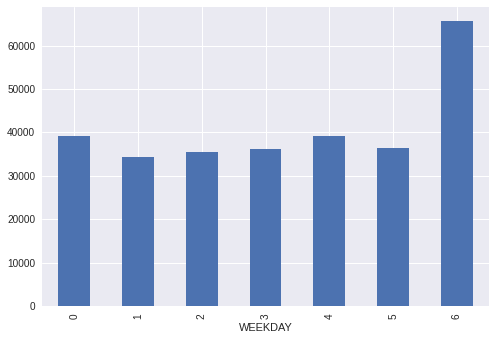

In [ ]:
df_AMZN['WEEKDAY'] = df_AMZN['order_date'].dt.weekday
weekday_ventas = df_AMZN.groupby('WEEKDAY').size()
weekday_ventas.plot.bar()

Aquí podemos observar que el día de la semana que más pedidos se realizan es el domingo. Posiblemente tenga que ver con que es un día de descanso para las personas, y pueden ocupar el tiempo de ocio buscando productos que satisfagan sus necesidades

In [ ]:
df_AMZN.groupby('State').size()

State
AK     2509
AL     5252
AR     4864
AZ     3712
CA    17130
CO     5036
CT     3037
DC     1865
DE      715
FL    10538
GA     6346
HI      800
IA     8170
ID     2348
IL    12628
IN     6738
KS     4879
KY     7397
LA     4709
MA     5001
MD     4163
ME     2857
MI     7137
MN     8020
MO     8876
MS     3565
MT     3122
NC     7549
ND     2350
NE     3775
NH     1695
NJ     4984
NM     2987
NV     1725
NY    15567
OH    10204
OK     5253
OR     3179
PA    14394
RI      492
SC     3771
SD     2993
TN     4981
TX    17510
UT     2650
VA     8557
VT     2504
WA     4155
WI     5529
WV     6447
WY     1727
dtype: int64

In [ ]:
df_AMZN.groupby(['Gender', 'Mes']).size()

Gender  Mes
F       1       9261
        2       5022
        3      13421
        4      18032
        5       6636
        6      11544
        7       7206
        8       6091
        9       6817
        10      5686
        11      7820
        12     42672
M       1       9883
        2       4991
        3      13590
        4      18883
        5       7339
        6      12202
        7       6967
        8       6247
        9       7652
        10      5632
        11      7981
        12     44817
dtype: int64

Como puede observarse, el mes 6 y 12 son los meses donde más se compra. Esto parecería tener relación con las vacaciones de los consumidores. Tanto hombres como mujeres realizan prácticamente la misma cantidad de ordenes mes a mes. Sin embargo, el hombre la supera levemente en la mayoría del año.

In [ ]:
def normalize(df_AMZN):
  result = df_AMZN.copy()

  for feature_name in df_AMZN,columns:
    max_val = df_AMZN[feature_name].max()
    min_val = df_AMZN[feature_name].min()
    result[feature_name] = (df_AMZN[feature_name] - min_val) / (max_val - min_val)

  return result

df_AMZN.head(5)

,order_id,order_date,status,sku,qty_ordered,price,value,discount_amount,total,category,...,County,City,State,Zip,Region,User Name,Discount_Percent,Mes,Total_Ventas,WEEKDAY
item_id,,,,,,,,,,,,,,,,,,,,,
574772,100354678,2020-01-10,received,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,...,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1,1887.9,4
574774,100354678,2020-01-10,received,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,...,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1,209.0,4
574777,100354680,2020-01-10,complete,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,...,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1,1349.1,4
574779,100354680,2020-01-10,complete,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,...,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1,719.1,4
595185,100367357,2020-11-13,received,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,...,Harmon,Vinson,OK,73571,South,jwtitus,0.0,11,199.8,4


In [ ]:
df_group_50 = df_AMZN[df_AMZN['age'] == '50']


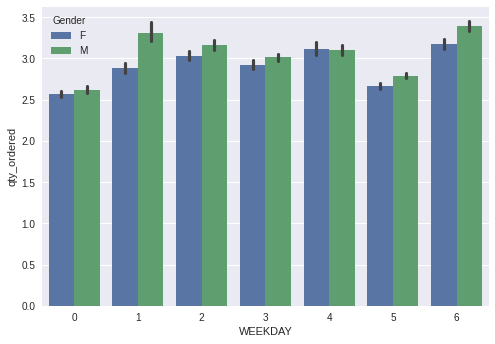

In [ ]:
sns.barplot(x='WEEKDAY', y = 'qty_ordered', hue = 'Gender', data = df_AMZN)

Según indica el gráfico, los hombres realizan más compras los días martes y domingos, mientras que las mujeres lo hacen los días jueves y domingos. Sabíamos por el gráfico anterior, que el domingo es el día más elegido para realizar compras.

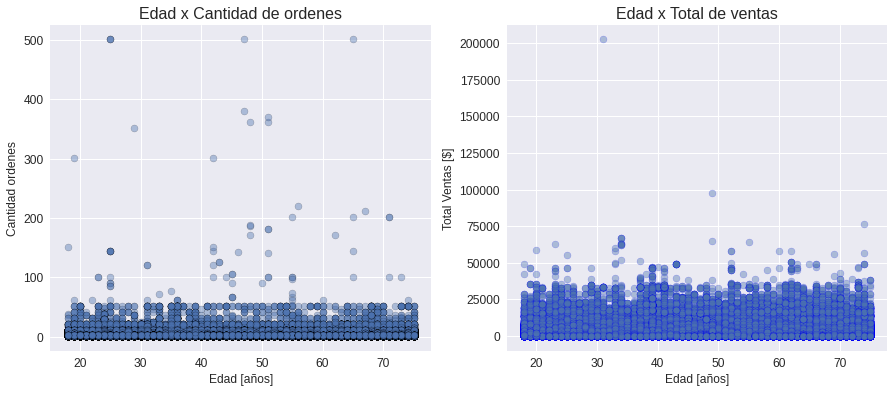

In [ ]:
# Edad vs. Cantidad de ordenes
plt.figure(figsize=(15,6))
plt.subplot(121)
# Hacemos un scatter plot
plt.scatter(df_AMZN['age'], df_AMZN['qty_ordered'], edgecolor='k', alpha=0.4)
plt.yticks(fontsize=12)
plt.ylabel('Cantidad ordenes', fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Edad [años]', fontsize=12)
plt.title('Edad x Cantidad de ordenes', fontsize=16)

# Edad vs Total de ventas
plt.subplot(122)
plt.scatter(df_AMZN['age'], df_AMZN['Total_Ventas'], edgecolor='b', alpha=0.4)
plt.xlabel('Edad [años]', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Total Ventas [$]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Edad x Total de ventas', fontsize=16)
plt.show()

Podemos ver en las dos dispersiones que no significan lo mismo la cantidad de ordenes pedidas que las compras (ventas) realizadas. Partiendo desde lo general, se puede ver que la gran mayoría de clientes realiza hasta 50 pedidos. Luego, La distribución de las ordenes por edades muestra un cierto grupo consolidado entre los 40 y los 70 años, que ordenan hasta 200 pedidos. Al referirnos a un mayor número de pedidos, entre 300 y 400, encontramos al grupo entre 45 y 50 años. Como ya sabíamos, el grupo de 50 años es el más predominante a hablar de edades.
Centrandonos en los grupos que realizan hasta 500 pedidos, que es el máximo según habíamos averiguado (describe), encontramos como "outliers" a los clientes de 25, 47 y 65 años. Esto quiere decir que las categorías cubren casi todo el espectro de edades de los clientes, abarcando así 40 años de diferencia entre el grupo más joven y el más adulto.

En cambio, al observar el grafico de total de ventas según las edades, podemos diferenciar a un grupo homogeneo hasta los $30.000. Igualmente, luego de ese monto y hasta los 60.000 dólares, los grupos describen una distribución pareja, a no ser por el grupo entre los 40 y 50 años, que casi no generan ventas superiores a 30.000 dólares.
Como outliers podemos marcar al grupo de 31 años, con ventas de 200.000 dólares; al grupo de 49 años, con ventas de 100.000 dólares; y por último al grupo de 75 años con ventas de 75.000 dólares.

Podemos concluir en que el grupo más numeroso, el de 50 años, realiza gran cantidad de ordenes, pero no genera grandes ventas. Es decir, realiza compras de bajo valor. Por otro lado, a grandes rasgos podríamos inferir en que la mayoría de los grupos por edades de los clientes, realizan desd muy pocas y hasta 50 ordenes, lo que representa un valor entre 0 y 30.000 dólares.

In [ ]:
df_AMZN.groupby(['year', 'category']).size()


year  category          
2020  Appliances            15490
      Beauty & Grooming      6656
      Books                   286
      Computing              3460
      Entertainment          7376
      Health & Sports        1651
      Home & Living          6830
      Kids & Baby            2425
      Men's Fashion         20067
      Mobiles & Tablets     25166
      Others                 1993
      School & Education      260
      Soghaat                2266
      Superstore             4299
      Women's Fashion       10954
2021  Appliances            17544
      Beauty & Grooming     11243
      Books                   528
      Computing              4650
      Entertainment          9976
      Health & Sports        6770
      Home & Living          7160
      Kids & Baby            4067
      Men's Fashion         20646
      Mobiles & Tablets     36595
      Others                24115
      School & Education      830
      Soghaat                4984
      Superstore       

Podemos ver como desde 2020 a 2021 hay categorias que han crecido sus ventas de manera exponencial. Una de las categorías que nos interesaba en las hipótesis era Health & Sports, ya que era la categoría con menos pedidos. Sin embargo, es notable como aumentaron las ventas en dicha categoría de un año al otro, pasando de 1651 pedidos a 6770, lo que arroja un aumento mayor al 400%. Esto puede deberse a que en el año 2020 el mundo se "congeló" por el inicio de la pandemia, y al haber transcurrido todo un año sin poder ni siquiera salir de los hogares, esto puede haber causado un gran deseo o necesidad de ejercicio, probablemente en casa.

En cuanto a las categorías de mayor peso en cuanto a pedidos, estamos hablando de Appliances, Men's & Women's Fashion, Mobiles & Tablets, diremos que han aumentado de 2020 a 2021. Sobre todo Women's Fashion (160%), Appliances (113%), Mobiles & Tablets (145%). Men's Fashion prácticamente no ha sufrido variación. Por lo tanto, podemos inferir en que hubo un gran aumento en el consumo de electrónicos, probablemente por la situación de encierro por la pandemia. Pero por otro lado, es notorio como al empezar a salir de los hogares a la rutina habitual, las mujeres realizaron grandes compras en productos de belleza, quedando en evidencia la importancia de esta categoría para este género.

In [ ]:
df_AMZN.groupby(['category']).size()



category
Appliances            33034
Beauty & Grooming     17899
Books                   814
Computing              8110
Entertainment         17352
Health & Sports        8421
Home & Living         13990
Kids & Baby            6492
Men's Fashion         40713
Mobiles & Tablets     61761
Others                26108
School & Education     1090
Soghaat                7250
Superstore            15024
Women's Fashion       28334
dtype: int64

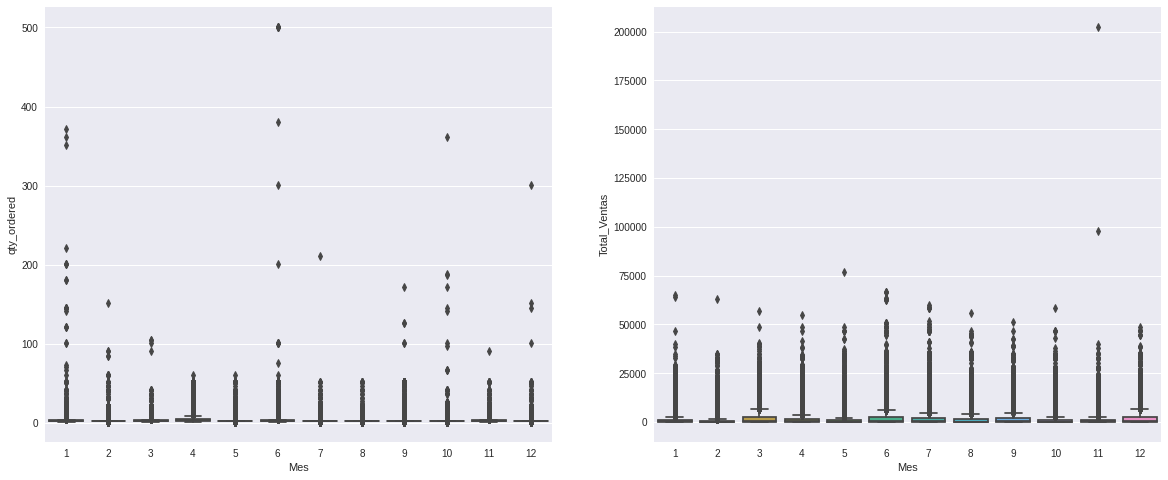

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.boxplot(x='Mes', y = 'qty_ordered', data = df_AMZN)
plt.subplot(122)
sns.boxplot(x='Mes', y = 'Total_Ventas', data = df_AMZN)

Comparando los dos graficos por meses, podemos identificar que en cuanto a cantidad de pedidos, el mes 6 es el gran ganador. Ya contábamos con la información de que el mes 6 y 12 eran los que más vendían. Sin embargo, en cuanto a pedidos el mes 12 no se encuentra cercano al mes 6, el que si se ubica luego del mes 6 es el mes 1, con lo cual nos llevamos una sorpresa.

En el gráfico derecho analizamos las ventas, y allí vemos que se equilibran todos los meses, muy distinto al gráfico izquierdo de los pedidos. Hasta podemos notar que el mes 11 tiene ventas récord en comparación a los demás (outliers a analizar).

Podemos concluir con que el mes 6 es el que más relación lleva en cuanto a cantidad de ordenes y total de ventas

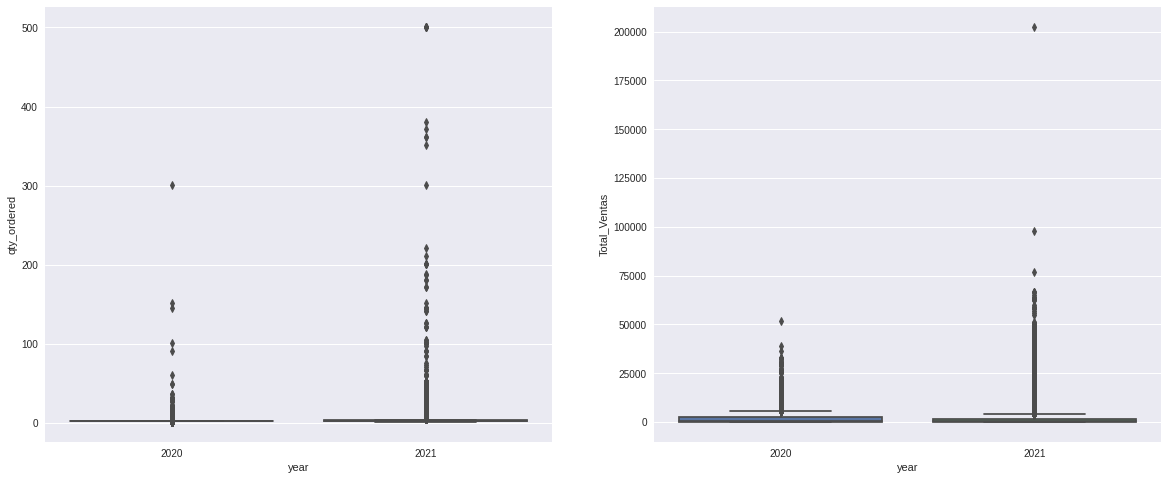

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.boxplot(x='year', y = 'qty_ordered', data = df_AMZN)
plt.subplot(122)
sns.boxplot(x='year', y = 'Total_Ventas', data = df_AMZN)

Al analizar del mismo modo que el anterior, pero esta vez tomando los años en vez de los meses, aquí encontramos una correlación entre cantidad de ordenes y total de ventas, siendo ampliamente superior el 2021, en el que se comenzó a reactivar la economía durante la pandemia.

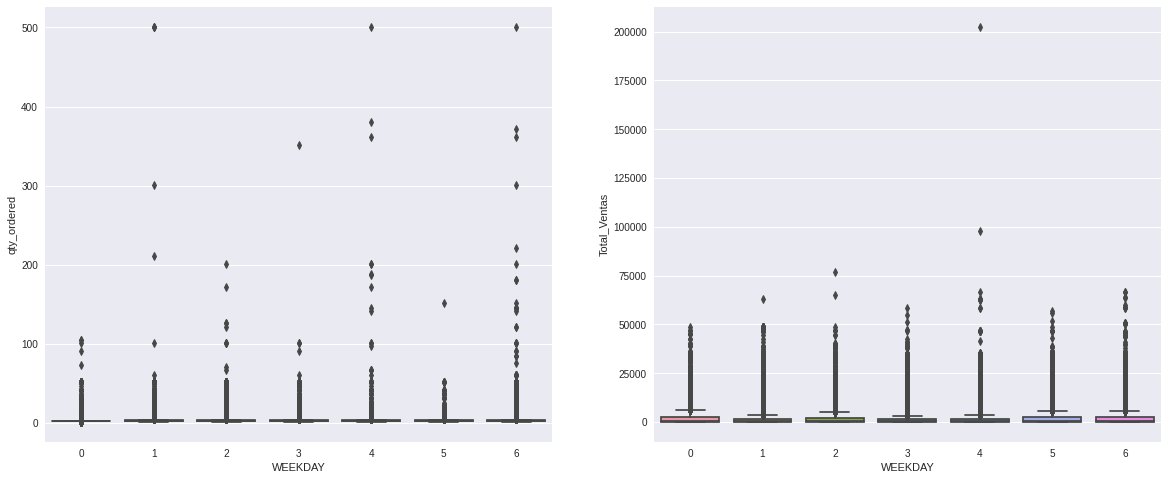

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.boxplot(x='WEEKDAY', y = 'qty_ordered', data = df_AMZN)
plt.subplot(122)
sns.boxplot(x='WEEKDAY', y = 'Total_Ventas', data = df_AMZN)

Por último, haremos el análisis según los días de la semana. Sabíamos por análisis anteriores que el día domingo era el más elegido para realizar compras. Sin embargo, podemos observar que no necesariamente es el que mayores beneficios genera. Ya que tomando el grafico de ventas, los días de la semana presentan una distribución pareja. Incluso, el día viernes podría ser el que mayor rentabilidad genera.

# Una opción para la segmentación de clientes planteada, podría ser el uso del algoritmo no supervisado K-Means, ya que es un método de agrupamiento que divide un conjunto de n observaciones en k grupos distintos gracias a valores medios.

El algoritmo cuenta con tres pasos:

Inicialización: una vez escogido k (número de grupos), se establecen los centroides en el espacio de los datos, por ejemplo asignando los k puntos aleatoriamente.

Asignación de las observaciones a los centroides: cada observación es asignada al centroide más cercano a ella usando la medida de distancia que se determine.

Actualización de los centroides: se actualiza la posición de los centroides de cada grupo tomando como posición la media de la localización de las observaciones de dicho grupo.
Se repiten los pasos 2 y 3 hasta que los centroides se quedan fijos, o se mueven por debajo de una distancia umbral fijada.

El algoritmo k-means es un algoritmo de optimización cuyo objetivo es minimizar la suma de distancias cuadráticas de cada observación al centroide de su clúster.

# QUINTA ENTREGA PROYECTO FINAL DATA SCIENCE 2023

Como se mencionó en la entrega anterior, el objetivo de la aplicación del algoritmo, será la segmentación de los clientes del e-comerce Amazon. Para ello se han aplicado dos algoritmos de tipo no supervisado, con el fin de detectar a priori cual de ellos será más óptimo. Uno de ellos fue el de Regresión Logística, y el otro el algoritmo KNN. Además, se aplicó el algoritmo no supervisado K-means, ya que es un algoritmo de agrupamiento, con el fin de obtener el número óptimo de clusters e identificar bien las segmentaciones de clientes planteadas en el objetivo del proyecto.



In [ ]:
df_AMZN.describe()

,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent,Mes,Total_Ventas,WEEKDAY
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079,7.490464,1737.265187,3.303137
std,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100,3.886899,3587.798470,2.109549
min,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000,4.000000,123.600000,1.000000
50%,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000,7.000000,330.000000,3.000000
75%,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000,12.000000,1999.800000,5.000000
max,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000,12.000000,202525.180000,6.000000


In [ ]:
def normalize(df_AMZN):
  result = df_AMZN.copy()

  for feature_name in df_AMZN,columns:
    max_val = df_AMZN[feature_name].max()
    min_val = df_AMZN[feature_name].min()
    result[feature_name] = (df_AMZN[feature_name] - min_val) / (max_val - min_val)

  return result


In [ ]:
X = df_AMZN[['Total_Ventas', 'age', 'Mes', 'qty_ordered']]

y = df_AMZN.Gender

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

X_train

,Total_Ventas,age,Mes,qty_ordered
item_id,,,,
843289,1247.4,54,12,2
893351,6600.0,21,6,2
667582,2800.0,62,12,2
633406,1062.0,70,12,2
741686,690.0,68,3,2
...,...,...,...,...
737984,7909.9,70,5,1
652886,2599.8,65,12,2
834718,3265.6,41,6,2


In [ ]:
X_test

,Total_Ventas,age,Mes,qty_ordered
item_id,,,,
621381,5479.2,34,12,2
738315,1999.8,19,5,2
868704,159.2,63,11,2
811617,300.0,64,4,6
728969,129.6,41,12,2
...,...,...,...,...
813175,800.0,18,4,4
696111,3670.0,27,12,2
665717,259.8,43,12,2


# REGRESION LOGISTICA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logr = LogisticRegression()

logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)

print('accuracy', accuracy_score(y_test, y_pred))
print('confusion_matrix', confusion_matrix(y_test, y_pred))
print('classification_report', classification_report(y_test, y_pred))


accuracy 0.5072015922065678


# KNN (K - NEIGHBORS)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print('accuracy', accuracy_score(y_test, y_pred))
print('confusion_matrix', confusion_matrix(y_test, y_pred))
print('classification_report', classification_report(y_test, y_pred))

accuracy 0.634420991986592
confusion_matrix [[17507 10683]
 [10257 18832]]
classification_report               precision    recall  f1-score   support

           F       0.63      0.62      0.63     28190
           M       0.64      0.65      0.64     29089

    accuracy                           0.63     57279
   macro avg       0.63      0.63      0.63     57279
weighted avg       0.63      0.63      0.63     57279



Lo que se buscó con la aplicación de los algoritmos fue poder predecir el género del cliente que realiza una o más compras, teniendo en cuenta las variables de:

* Total de Ventas (cantidad de pedidos * precio)
* Edad
* Mes
* Cantidad de pedidos



Luego de observar las métricas que ambos arrojaron, es evidente que el algoritmo KNN es el que mejor se comporta con esta base de datos. Esta conclusión resulta de observar sobre todo el accuracy, que es la métrica más importante dentro de los algoritmos no supervisados. En el primer algoritmo (Regresión Logística), se obtuvo 0.5, lo cual es muy bajo.
Luego, en el algoritmo KNN se obtuvo 0.63 de accuracy, lo cual es muy bajo pero mucho mejor que el 0.5 de la Regresión Logística.
Sin embargo, probando con distintos valores de neighbors, se pudo observar que al disminuir el valor de estos, el accuracy comenzó a aumentar. De manera análoga, al aumentar el valor de los mismos, el accuracy disminuía.
Inicialmente se probó con 5 neighbors.
Luego con 4, 3, 2, y hasta 1. El resultado del accuracy para el valor n_neighbors = 1 fue de 0.69, lo cual indica que hay posibilidad de que el accuracy pueda mejorarse bastante con otras modificaciones a lo largo del proyecto. Como así también, posiblemente pueda mejorarse el rendimiento del primer algoritmo aplicado.



A continuacion se aplicará el algoritmo K-means, pero esta vez utilizando menos variables que en los dos algoritmos anteriores. Esta vez se utilizarán las variables:
* Edad
* Mes
* Cantidad de pedidos

# K-MEANS

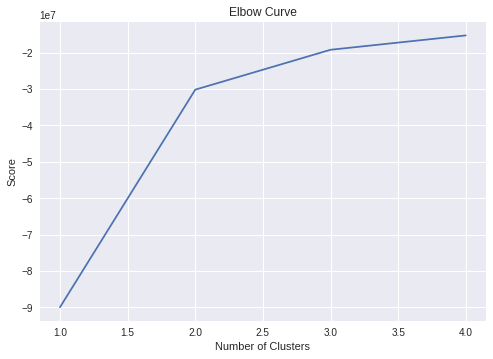

In [ ]:
X = np.array(df_AMZN[["age","qty_ordered","Mes"]])
y = np.array(df_AMZN['Gender'])

# rango de cluster que deseo probar
Nc = range(1, 5)

kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


Mediante el gráfico del codo, podemos concluir que el número óptimo de clusters se encuentra entre 2 y 3. Es por ello que aplicaremos el algoritmo para cada alternativa.

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[27.50888532  3.05031959  7.49080935]
 [47.04936793  2.95364795  7.51922491]
 [65.97249857  3.02906095  7.46066231]]


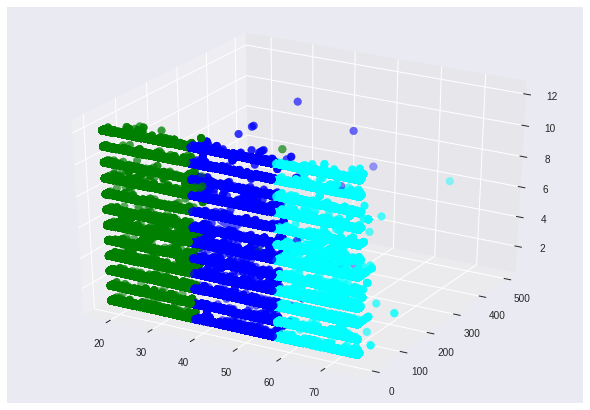

In [ ]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['green','blue', 'cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

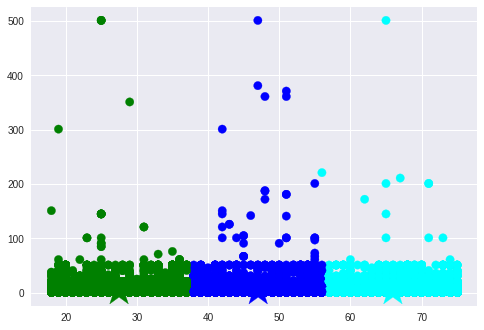

In [ ]:
f1 = df_AMZN['age'].values
f2 = df_AMZN['qty_ordered'].values




#graficamos los cluster para estas dos caracteristicas
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

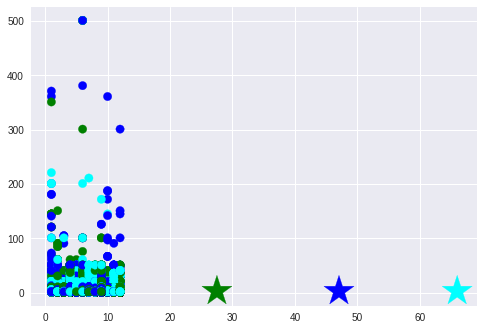

In [ ]:
f1 = df_AMZN['Mes'].values
f2 = df_AMZN['qty_ordered'].values




#graficamos los cluster para estas dos caracteristicas
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[31.93017167  3.01556198  7.51659312]
 [60.82211828  3.00709559  7.46474032]]


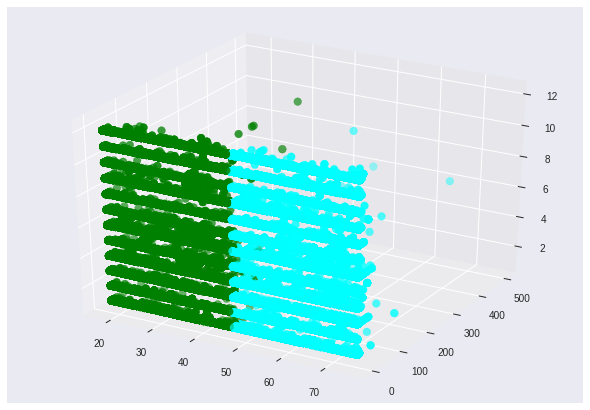

In [ ]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['green', 'cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

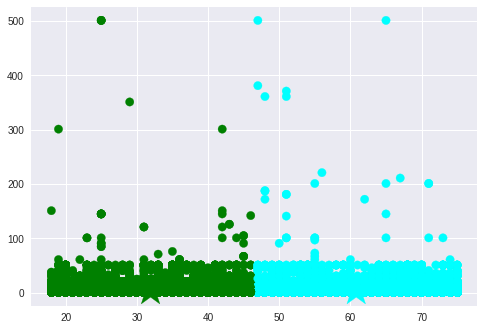

In [ ]:
f1 = df_AMZN['age'].values
f2 = df_AMZN['qty_ordered'].values




#graficamos los cluster para estas dos caracteristicas
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

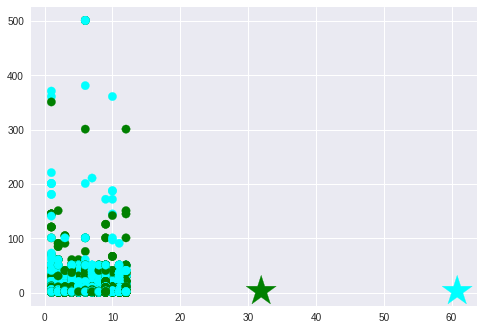

In [ ]:
f1 = df_AMZN['Mes'].values
f2 = df_AMZN['qty_ordered'].values




#graficamos los cluster para estas dos caracteristicas
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

Luego de haber trabajado con tres y dos clusters (en ese orden), gracias al gráfico 3D podemos observar los clusters claramente diferenciados en ambos casos, casi sin superposiciones.
Por otro lado, se realizaron gráficos en 2D, teniendo en cuenta las variables ¨Edad¨ y ¨Cantidad de ordenes¨ por un lado, y ¨Mes¨ y ¨Cantidad de ordenes¨, por el otro. En la primera de las relaciones, se identifica un buen agrupamiento tanto con dos clusters como con 3.
Contrariamente, al analizar las variables "Mes" y "Cantidad de ordenes", vemos una total superposición de los grupos o clusters, por lo que dicha relación no puede tomarse para el presente análisis. Esto puede deberse a casos en los que no existan grupos naturales, o clusters que contengan una verdadera razón de ser, y por esta razón es que no son de utilidad.